<a href="https://colab.research.google.com/github/Phonchanit/bsc_dpdm24/blob/main/Frequent_Patterns_(Association_Rules).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import with Path

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/มหาลัยขอนแก่น/3-2/Data prepare & Data Mining/bsc_dpdm24_data'

Mounted at /content/drive


In [ ]:
data = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin-1')

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


## Quiz
ข้อมูลมาจากกี่ประเทศ

In [ ]:
set(data['Country'])

{'Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'EIRE',
 'European Community',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'USA',
 'United Arab Emirates',
 'United Kingdom',
 'Unspecified'}

In [ ]:
len(set(data['Country']))

38

# แปลง data "reduce marketbasket" ให้อยู่ในรูปแบบ Transaction Data ด้วย ```groupby.apply(list)```




In [ ]:
transactions = data.groupby('InvoiceNo')['StockCode'].apply(list)
transactions

,StockCode
InvoiceNo,
536365,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,..."
536366,"[22633, 22632]"
536367,"[84879, 22745, 22748, 22749, 22310, 84969, 226..."
536368,"[22960, 22913, 22912, 22914]"
536369,[21756]
...,...
C581484,[23843]
C581490,"[22178, 23144]"
C581499,[M]


# Association Rules

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=66d47c56f54a349b4ec7cd89d9a4118d6e08137055d48fa1a6b0bf385d48b24b
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [ ]:
from apyori import apriori

In [ ]:
frequentItemsets = list(apriori(transactions,min_support = 0.065))
frequentItemsets

[RelationRecord(items=frozenset({'22423'}), support=0.08386100386100385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22423'}), confidence=0.08386100386100385, lift=1.0)]),
 RelationRecord(items=frozenset({'47566'}), support=0.06586872586872587, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'47566'}), confidence=0.06586872586872587, lift=1.0)]),
 RelationRecord(items=frozenset({'85099B'}), support=0.08243243243243244, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85099B'}), confidence=0.08243243243243244, lift=1.0)]),
 RelationRecord(items=frozenset({'85123A'}), support=0.08671814671814672, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85123A'}), confidence=0.08671814671814672, lift=1.0)])]

In [ ]:
len(frequentItemsets)

4

In [ ]:
# มีทั้งหมด 4 กฏ

In [ ]:
frequentItemsets[0][0]

frozenset({'22423'})

In [ ]:
frequentItemsets[0]

RelationRecord(items=frozenset({'22423'}), support=0.08386100386100385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22423'}), confidence=0.08386100386100385, lift=1.0)])

In [ ]:
dir(frequentItemsets[0][0]) # ศึกษาโครงสร้างก้อนที่จะแปลงเป็น list ## dir ใช้ดู properties ของ Itemset

['__and__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 'copy',
 'difference',
 'intersection',
 'isdisjoint',
 'issubset',
 'issuperset',
 'symmetric_difference',
 'union']

In [ ]:
frequentItemsets[0][0].__len__() # Item set นี้ มีขนาด 1 ซึ่งสามารถนำมาเขียนโปรแกรมที่มีขนาด 1 ได้ โดยไม่ต้องเสียเวลาดู

1

In [ ]:
min_sup = 0.03

frequentItemsets = list(apriori(transactions,min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

# ใช้ดูว่า min support ไหนที่มี item set

yes
RelationRecord(items=frozenset({'22386', '85099B'}), support=0.03216216216216216, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22386', '85099B'}), confidence=0.03216216216216216, lift=1.0), OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6766856214459789, lift=8.20897311262335), OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}), confidence=0.39016393442622943, lift=8.20897311262335)])
yes
RelationRecord(items=frozenset({'22699', '22697'}), support=0.03027027027027027, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.03027027027027027, lift=1.0), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7417218543046358, lift=17.1523178807947), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7, lift=17.1523178807947)])


1. RelationRecord(items=frozenset({'22386', '85099B'}),support=0.03216216216216216,

> ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22386', '85099B'}), confidence=0.03216216216216216, lift=1.0),

> OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6766856214459789, lift=8.20897311262335),

> OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}), confidence=0.39016393442622943, lift=8.20897311262335)])

2. RelationRecord(items=frozenset({'22697', '22699'}), support=0.03027027027027027,

> ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22697', '22699'}), confidence=0.03027027027027027, lift=1.0),

> OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7417218543046358, lift=17.1523178807947),

> OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7, lift=17.1523178807947)])


Query เอาเฉพาะที่เราสนใจ

In [ ]:
set(data[(data['StockCode']=='22386') | (data['StockCode']=='85099B') | (data['StockCode']=='22699') | (data['StockCode']=='22697') ]['Description'])

{'GREEN REGENCY TEACUP AND SAUCER',
 'JUMBO BAG PINK POLKADOT',
 'JUMBO BAG RED RETROSPOT',
 'ROSES REGENCY TEACUP AND SAUCER '}

## Quiz
รหัสสินค้า 22386 และ 85099B เป็นสินค้าอะไร

In [ ]:
set(data[(data['StockCode']=='22386')]['Description'])

{'JUMBO BAG PINK POLKADOT'}

In [ ]:
set(data[(data['StockCode']=='85099B')]['Description'])

{'JUMBO BAG RED RETROSPOT'}

RelationRecord(items=frozenset({'22699', '22697'}), support=0.03027027027027027,

ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.03027027027027027, lift=1.0),

OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7417218543046358, lift=17.1523178807947),

OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7, lift=17.1523178807947)])

In [ ]:
set(data[(data['StockCode']=='22699') | (data['StockCode']=='22697')]['InvoiceNo'])

{'570720',
 'C545724',
 '542862',
 '545719',
 '539594',
 '571713',
 '564191',
 '551160',
 '581219',
 '558116',
 '570187',
 '565917',
 '577020',
 '549016',
 '548673',
 '566581',
 '567140',
 '549052',
 '566193',
 '544205',
 '562202',
 '555147',
 'C567358',
 '545022',
 '552687',
 '565838',
 '539564',
 '559817',
 '573125',
 '545526',
 '548159',
 '543487',
 '558372',
 '537955',
 '571219',
 '543629',
 '541130',
 '540662',
 '544186',
 '574076',
 '578331',
 'C539071',
 '573083',
 '580774',
 '559112',
 'C550808',
 '575607',
 '578031',
 '562219',
 '570872',
 '579711',
 '545411',
 '578993',
 '543530',
 '568333',
 '537335',
 '566170',
 '550899',
 '552257',
 '577355',
 '545667',
 '536804',
 '554036',
 '562955',
 '554040',
 '563951',
 '567673',
 '553718',
 '550307',
 '564817',
 '554974',
 '545428',
 '577029',
 '576672',
 '561926',
 '576381',
 '544305',
 '574368',
 '537754',
 '579885',
 '570701',
 '547712',
 '559800',
 '559173',
 '549295',
 '536862',
 '567663',
 '575939',
 '575138',
 '560634',
 '5662

In [ ]:
data[data['InvoiceNo']=='562950']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
297488,562950,22752,SET 7 BABUSHKA NESTING BOXES,2,08/11/2011 09:56,8.50,15608.0,United Kingdom
297489,562950,22755,SMALL PURPLE BABUSHKA NOTEBOOK,12,08/11/2011 09:56,0.85,15608.0,United Kingdom
297490,562950,22753,SMALL YELLOW BABUSHKA NOTEBOOK,12,08/11/2011 09:56,0.85,15608.0,United Kingdom
297491,562950,22754,SMALL RED BABUSHKA NOTEBOOK,12,08/11/2011 09:56,0.85,15608.0,United Kingdom
297492,562950,22757,LARGE RED BABUSHKA NOTEBOOK,12,08/11/2011 09:56,1.25,15608.0,United Kingdom
297493,562950,22758,LARGE PURPLE BABUSHKA NOTEBOOK,12,08/11/2011 09:56,1.25,15608.0,United Kingdom
297494,562950,22756,LARGE YELLOW BABUSHKA NOTEBOOK,12,08/11/2011 09:56,1.25,15608.0,United Kingdom
297495,562950,23310,BUBBLEGUM RING ASSORTED,36,08/11/2011 09:56,0.42,15608.0,United Kingdom
297496,562950,23280,FOLDING BUTTERFLY MIRROR HOT PINK,12,08/11/2011 09:56,0.83,15608.0,United Kingdom
297497,562950,22383,LUNCH BAG SUKI DESIGN,10,08/11/2011 09:56,1.65,15608.0,United Kingdom


#HW3จาก Data Reduced_Marketbasket
1. วิเคราะห์พฤติกรรมผู้บริโภค (groupby customer id) แต่ละทวีป
2. คิดเอง

##Clean data

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


### ดรอป missing ใน Description และ CustomerID

In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# prompt: Description	กำจัดค่า nan

# Drop rows with NaN values in the 'Description' column
data = data.dropna(subset=['Description'])

In [ ]:
# prompt: # prompt: ดรอป Unknownและ missing ใน Continent และ CustomerID

# Drop rows where 'Continent' is 'Unknown' or 'CustomerID' is missing
data = data.dropna(subset=['CustomerID'])

In [ ]:
# prompt: ดูmissing ในแต่ละ colum
# Check for missing values in each column
missing_values = data.isnull().sum()
missing_values

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


# HW3
1. วิเคราะห์พฤติกรรมผู้บริโภค (groupby customer id) แต่ละทวีป

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Dataset'

Mounted at /content/drive


In [ ]:
data = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin-1')

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [ ]:
# prompt: ตรวจสอบค่า missing ในแต่ละคอลัมน์
# Check for missing values in each column
missing_values = data.isnull().sum()
missing_values

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# prompt: Drop ค่า Missing ในคอลัมน์ Description
# Drop rows with missing values in the 'Description' column
data = data.dropna(subset=['Description'])

In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,133626
Country,0


In [ ]:
# prompt: drop ค่า missing ของคอลัมน์ CustomerID

# Drop rows with missing values in the 'CustomerID' column
data = data.dropna(subset=['CustomerID'])
missing_values = data.isnull().sum()
missing_values

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


ข้อมูลมาจากกี่ประเทศ

In [ ]:
set(data['Country'])

{'Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'EIRE',
 'European Community',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'USA',
 'United Arab Emirates',
 'United Kingdom',
 'Unspecified'}

In [ ]:
len(set(data['Country']))

37

In [ ]:
# prompt: จาก Country แบ่งเป็นทวีป

# Assuming 'data' DataFrame is already loaded as in the provided code.
# Create a dictionary to map countries to continents.
# This is a simplified example and might need adjustments for more accurate continent assignment.
country_to_continent = {
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Australia': 'Oceania',
    'Netherlands': 'Europe',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'EIRE': 'Europe',
    'Switzerland': 'Europe',
    'Spain': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Italy': 'Europe',
    'Belgium': 'Europe',
    'Lithuania': 'Europe',
    'Japan': 'Asia',
    'Iceland': 'Europe',
    'Channel Islands': 'Europe',
    'Denmark': 'Europe',
    'Cyprus': 'Europe',
    'Sweden': 'Europe',
    'Austria': 'Europe',
    'Israel': 'Asia',
    'Finland': 'Europe',
    'Bahrain': 'Asia',
    'Greece': 'Europe',
    'Hong Kong': 'Asia',
    'Singapore': 'Asia',
    'Lebanon': 'Asia',
    'United Arab Emirates': 'Asia',
    'Saudi Arabia': 'Asia',
    'Canada': 'North America',
    'Unspecified': 'Unknown',
    'Brazil': 'South America',
    'USA': 'North America',
    'European Community': 'Europe',
    'Malta': 'Europe',
    'RSA': 'Africa'
}


# Add a 'Continent' column to the DataFrame
data['Continent'] = data['Country'].map(country_to_continent)

In [ ]:
# prompt: นับจำนวน Continent แต่ละอัน

continent_counts = data['Continent'].value_counts()
continent_counts

,count
Continent,
Europe,403787
Oceania,1259
Asia,977
North America,442
Unknown,244
Africa,58
South America,32


In [ ]:
# prompt: ดรอป Unknown ออกจาก Continent

# Assuming 'data' DataFrame is already loaded as in the provided code.
data = data[data['Continent'] != 'Unknown']
transactions = data.groupby('Continent')['CustomerID'].apply(list)
transactions

continent_counts = data['Continent'].value_counts()
continent_counts

,count
Continent,
Europe,403787
Oceania,1259
Asia,977
North America,442
Africa,58
South America,32


In [ ]:
# prompt: สร้างคอลัมน์ใหม่ชื่อ 'TotalPrice' จากการคูณกันของข้อมูลในแต่ละ row ของ UnitPrice กับ Quantity

data['TotalPrice'] = data['UnitPrice'] * data['Quantity']

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,Europe,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,Europe,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,Europe,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,Europe,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,Europe,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,Europe,16.60


# 1. วิเคราะห์พฤติกรรมผู้บริโภค (groupby customer id) แต่ละทวีป

In [ ]:
avg_spending_per_continent = data.groupby(['Continent', 'CustomerID'])['TotalPrice'].sum().reset_index().groupby('Continent')['TotalPrice'].mean()

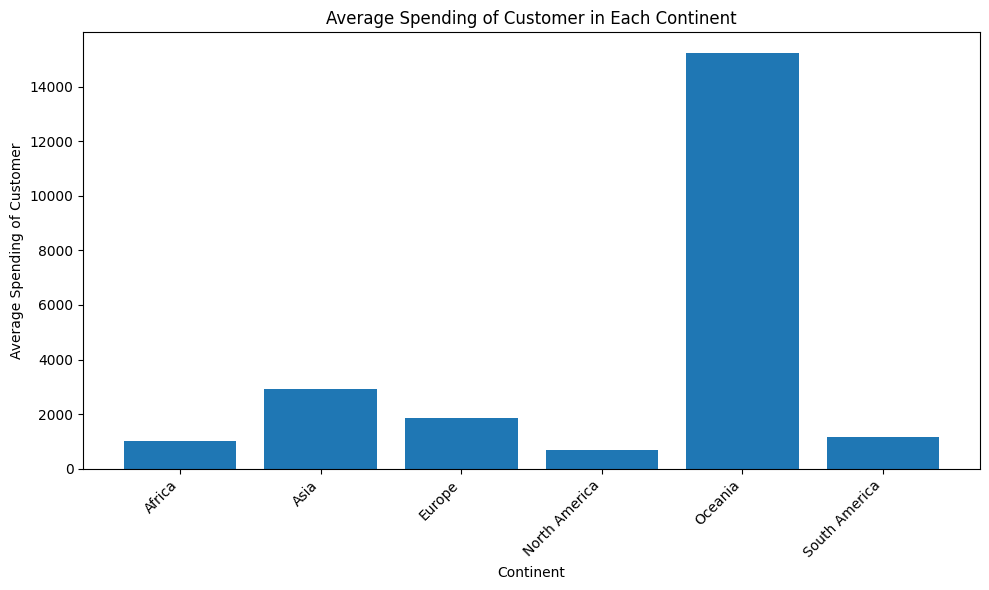

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(avg_spending_per_continent.index, avg_spending_per_continent.values)
plt.xlabel("Continent")
plt.ylabel("Average Spending of Customer")
plt.title("Average Spending of Customer in Each Continent")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: วิเคราะห์ลูกค้าในแต่ละทวีปว่าซื้ออะไร

# Analyze the most popular items purchased by customers in each continent.
popular_items_per_continent = data.groupby(['Continent', 'Description'])['Quantity'].sum().reset_index()
popular_items_per_continent = popular_items_per_continent.sort_values(['Continent', 'Quantity'], ascending=[True, False])

# Display the top 5 popular items for each continent
for continent in popular_items_per_continent['Continent'].unique():
    print(f"\nTop 5 popular items in {continent}:")
    print(popular_items_per_continent[popular_items_per_continent['Continent'] == continent].head(5))


Top 5 popular items in Africa:
   Continent                    Description  Quantity
0     Africa    4 TRADITIONAL SPINNING TOPS        12
2     Africa  ASSORTED BOTTLE TOP  MAGNETS         12
27    Africa      PACK OF 6 BIRDY GIFT TAGS        12
45    Africa  SET OF 20 KIDS COOKIE CUTTERS        12
56    Africa         WOODEN BOX OF DOMINOES        12

Top 5 popular items in Asia:
    Continent                         Description  Quantity
457      Asia                  RABBIT NIGHT LIGHT      3401
377      Asia      PACK OF 12 TRADITIONAL CRAYONS      1201
517      Asia  ROUND SNACK BOXES SET OF 4 FRUITS        882
347      Asia             MINI PAINT SET VINTAGE        613
318      Asia    MAGIC DRAWING SLATE BAKE A CAKE        577

Top 5 popular items in Europe:
     Continent                         Description  Quantity
4491    Europe   WORLD WAR 2 GLIDERS ASSTD DESIGNS     52350
2457    Europe             JUMBO BAG RED RETROSPOT     44816
903     Europe       ASSORTED COLOUR BI

------------------

<ipython-input-48-271dc6f62fe4>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_spending = data.groupby('Continent')['TotalPrice'].resample('M').mean().reset_index()


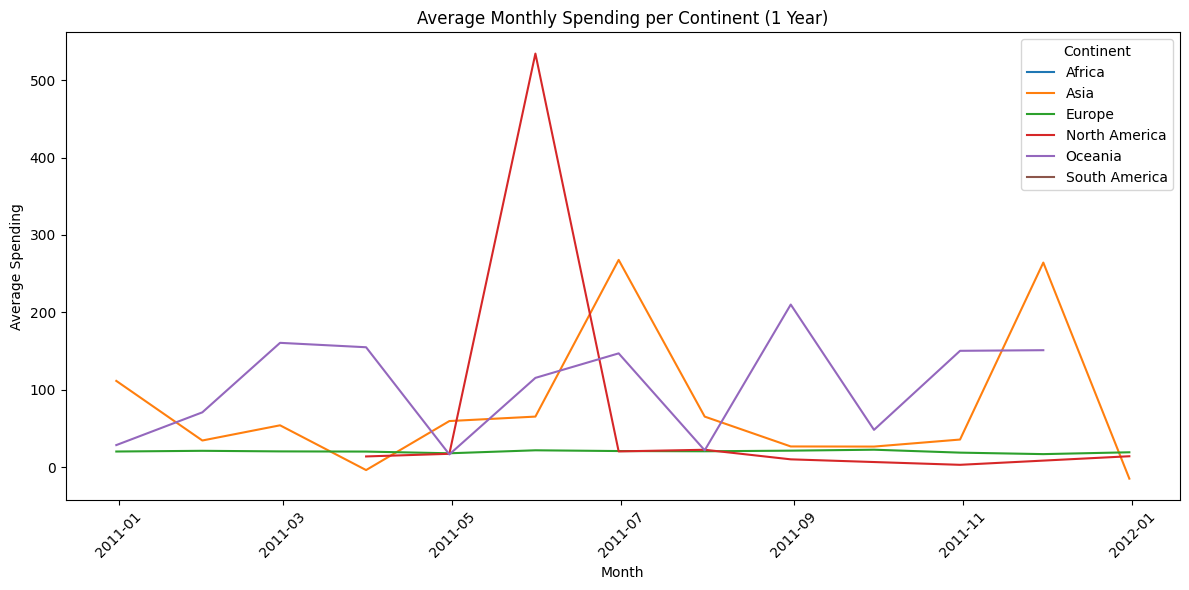

In [ ]:
# prompt: Line Chart แนวโน้มการซื้อสินค้าโดยเฉลี่ยแต่ละทวีป ระยะเวลา 1 ปี

# Assuming 'data' DataFrame and necessary columns ('InvoiceDate', 'Continent', 'TotalPrice') are already prepared.

# Convert 'InvoiceDate' to datetime objects if it's not already
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Set 'InvoiceDate' as the index
data = data.set_index('InvoiceDate')

# Resample to monthly frequency and calculate the average spending per continent
monthly_spending = data.groupby('Continent')['TotalPrice'].resample('M').mean().reset_index()


# Create the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceDate', y='TotalPrice', hue='Continent', data=monthly_spending)
plt.title('Average Monthly Spending per Continent (1 Year)')
plt.xlabel('Month')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.legend(title='Continent')
plt.tight_layout()
plt.show()

###แบ่ง วัน เดือน ปี

In [ ]:
# prompt: ในตาราง InvoiceDate แยก วัน เดือนปี มาสร้าง colum ใหม่

# Convert 'InvoiceDate' to datetime objects
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract day, month, and year
data['Day'] = data['InvoiceDate'].dt.day
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year

data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,9,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011


In [ ]:
set(data['Day'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31}

In [ ]:
set(data['Month'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [ ]:
set(data['Year'])

{2010, 2011}

###  จากประเทศ ทำเป็น ทวีป

In [ ]:
# prompt: จาก Country แบ่งเป็นทวีป

# Assuming 'data' DataFrame is already loaded as in the provided code.
# Create a dictionary to map countries to continents.
# This is a simplified example and might need adjustments for more accurate continent assignment.
country_to_continent = {
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Australia': 'Oceania',
    'Netherlands': 'Europe',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'EIRE': 'Europe',
    'Switzerland': 'Europe',
    'Spain': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Italy': 'Europe',
    'Belgium': 'Europe',
    'Lithuania': 'Europe',
    'Japan': 'Asia',
    'Iceland': 'Europe',
    'Channel Islands': 'Europe',
    'Denmark': 'Europe',
    'Cyprus': 'Europe',
    'Sweden': 'Europe',
    'Austria': 'Europe',
    'Israel': 'Asia',
    'Finland': 'Europe',
    'Bahrain': 'Asia',
    'Greece': 'Europe',
    'Hong Kong': 'Asia',
    'Singapore': 'Asia',
    'Lebanon': 'Asia',
    'United Arab Emirates': 'Asia',
    'Saudi Arabia': 'Asia',
    'Canada': 'North America',
    'Unspecified': 'Unknown',
    'Brazil': 'South America',
    'USA': 'North America',
    'European Community': 'Europe',
    'Malta': 'Europe',
    'RSA': 'Africa'
}


# Add a 'Continent' column to the DataFrame
data['Continent'] = data['Country'].map(country_to_continent)

In [ ]:
continent_counts = data['Continent'].value_counts()
continent_counts

,count
Continent,
Europe,403787
Oceania,1259
Asia,977
North America,442
Unknown,244
Africa,58
South America,32


In [ ]:
data = data[data['Continent'] != 'Unknown']

In [ ]:
continent_counts = data['Continent'].value_counts()
continent_counts

,count
Continent,
Europe,403787
Oceania,1259
Asia,977
North America,442
Africa,58
South America,32


In [ ]:
set(data['Country'])

{'Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'EIRE',
 'European Community',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'USA',
 'United Arab Emirates',
 'United Kingdom'}

In [ ]:
# prompt: นับจำนวนประเทศ

len(set(data['Country']))

36

###ราคาสินค้า

In [ ]:
data['TotalPrice'] = data['UnitPrice'] * data['Quantity']

<ipython-input-21-2a5be58c92ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalPrice'] = data['UnitPrice'] * data['Quantity']


In [ ]:
avg_spending_per_continent = data.groupby(['Continent', 'CustomerID'])['TotalPrice'].sum().reset_index().groupby('Continent')['TotalPrice'].mean()

In [ ]:
avg_spending_per_continent

,TotalPrice
Continent,
Africa,1002.310000
Asia,2933.210000
Europe,1869.392647
North America,674.662500
Oceania,15230.807778
South America,1143.600000


In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Continent,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,Europe,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,Europe,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,9,12,2011,Europe,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,12,2011,Europe,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,Europe,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,Europe,16.60


In [ ]:
transactions_lol = data.groupby('CustomerID')['StockCode'].apply(list)
transactions_lol

,StockCode
CustomerID,
12346.0,"[23166, 23166]"
12347.0,"[85116, 22375, 71477, 22492, 22771, 22772, 227..."
12348.0,"[84992, 22951, 84991, 84991, 21213, 21213, 226..."
12349.0,"[23112, 23460, 21564, 21411, 21563, 22131, 221..."
12350.0,"[21908, 22412, 79066K, 79191C, 22348, 84086C, ..."
...,...
18280.0,"[82484, 22180, 22467, 22725, 22727, 22495, 223..."
18281.0,"[22037, 22716, 22028, 23007, 23008, 23209, 22467]"
18282.0,"[21270, 23187, 23295, 22089, 21108, 21109, 224..."


In [ ]:
# prompt: นับจำนวน CustomerID แต่ละทวีป

# Count CustomerID for each continent
customer_counts_per_continent = data.groupby('Continent')['CustomerID'].nunique()
customer_counts_per_continent

,CustomerID
Continent,
Africa,1
Asia,19
Europe,4331
North America,8
Oceania,9
South America,1


##1. วิเคราะห์พฤติกรรมผู้บริโภค (groupby customer id) แต่ละทวีป

###ทวีป Europe

In [ ]:
# prompt: เอาเฉพาะข้อมูล Europe มา

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.

# Filter data for Europe
europe_data = data[data['Continent'] == 'Europe']

# Now 'europe_data' contains only the rows where the 'Continent' is 'Europe'
europe_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Year,Continent,TotalPrice
InvoiceDate,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,1,12,2010,Europe,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,1,12,2010,Europe,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,9,12,2011,Europe,10.20
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,9,12,2011,Europe,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,9,12,2011,Europe,16.60


In [ ]:
transactions_europe = europe_data.groupby('CustomerID')['StockCode'].apply(list)

In [ ]:
min_sup = 0.073

frequentItemsets_o  = list(apriori(transactions_europe,min_support = min_sup))
for i in frequentItemsets_o :
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22910', '22086'}), support=0.0750404063726622, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22910', '22086'}), confidence=0.0750404063726622, lift=1.0), OrderedStatistic(items_base=frozenset({'22086'}), items_add=frozenset({'22910'}), confidence=0.530179445350734, lift=4.916931858274152), OrderedStatistic(items_base=frozenset({'22910'}), items_add=frozenset({'22086'}), confidence=0.6959314775160599, lift=4.916931858274152)])
yes
RelationRecord(items=frozenset({'22699', '22423'}), support=0.07319325790810437, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22423'}), confidence=0.07319325790810437, lift=1.0), OrderedStatistic(items_base=frozenset({'22423'}), items_add=frozenset({'22699'}), confidence=0.36353211009174313, lift=3.748708497160332), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22423'}), confidence=0.7547619047619049, lift=3.7487084

In [ ]:
set(data[(data['StockCode']=='22086') |  (data['StockCode']=='22910')  | (data['StockCode']=='22699') |  (data['StockCode']=='22697')]['Description'])

{'GREEN REGENCY TEACUP AND SAUCER',
 "PAPER CHAIN KIT 50'S CHRISTMAS ",
 'PAPER CHAIN KIT VINTAGE CHRISTMAS',
 'ROSES REGENCY TEACUP AND SAUCER '}

In [ ]:
set(data[(data['StockCode']=='22423')]['Description'])

{'REGENCY CAKESTAND 3 TIER', 'damages', 'faulty'}

###ทวีป Asia

In [ ]:
# Filter data for Asia
Asia_data = data[data['Continent'] == 'Asia']

# Now 'Asia_data' contains only the rows where the 'Continent' is 'Asia'
Asia_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Year,Continent,TotalPrice
InvoiceDate,,,,,,,,,,,,
2010-12-05 15:46:00,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2.55,12763.0,Japan,5,12,2010,Asia,15.30
2010-12-05 15:46:00,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,0.42,12763.0,Japan,5,12,2010,Asia,5.04
2010-12-05 15:46:00,537218,22716,CARD CIRCUS PARADE,12,0.42,12763.0,Japan,5,12,2010,Asia,5.04
2010-12-05 15:46:00,537218,22983,CARD BILLBOARD FONT,12,0.42,12763.0,Japan,5,12,2010,Asia,5.04
2010-12-05 15:46:00,537218,22030,SWALLOWS GREETING CARD,12,0.42,12763.0,Japan,5,12,2010,Asia,5.04
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-06 11:40:00,C580832,21731,RED TOADSTOOL LED NIGHT LIGHT,-2,1.45,12753.0,Japan,6,12,2011,Asia,-2.90
2011-12-06 11:40:00,C580832,23480,MINI LIGHTS WOODLAND MUSHROOMS,-15,3.29,12753.0,Japan,6,12,2011,Asia,-49.35
2011-12-06 11:40:00,C580832,22466,FAIRY TALE COTTAGE NIGHT LIGHT,-17,1.65,12753.0,Japan,6,12,2011,Asia,-28.05


In [ ]:
transactions_Asia = Asia_data.groupby('CustomerID')['StockCode'].apply(list)

In [ ]:
min_sup = 0.15

frequentItemsets_o  = list(apriori(transactions_Asia,min_support = min_sup))
for i in frequentItemsets_o :
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'20724', '23240'}), support=0.15789473684210525, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20724', '23240'}), confidence=0.15789473684210525, lift=1.0), OrderedStatistic(items_base=frozenset({'20724'}), items_add=frozenset({'23240'}), confidence=1.0, lift=3.8000000000000003), OrderedStatistic(items_base=frozenset({'23240'}), items_add=frozenset({'20724'}), confidence=0.6, lift=3.8000000000000003)])
yes
RelationRecord(items=frozenset({'21078', '21080'}), support=0.15789473684210525, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'21078', '21080'}), confidence=0.15789473684210525, lift=1.0), OrderedStatistic(items_base=frozenset({'21078'}), items_add=frozenset({'21080'}), confidence=1.0, lift=4.75), OrderedStatistic(items_base=frozenset({'21080'}), items_add=frozenset({'21078'}), confidence=0.75, lift=4.75)])
yes
RelationRecord(items=frozenset({'21210', '21080'}), support=0.157

In [ ]:
set(data[(data['StockCode']=='22697') |  (data['StockCode']=='22699')]['Description'])

## 1. วิเคราะห์พฤติกรรมผู้บริโภค (groupby customer id) แต่ละทวีป

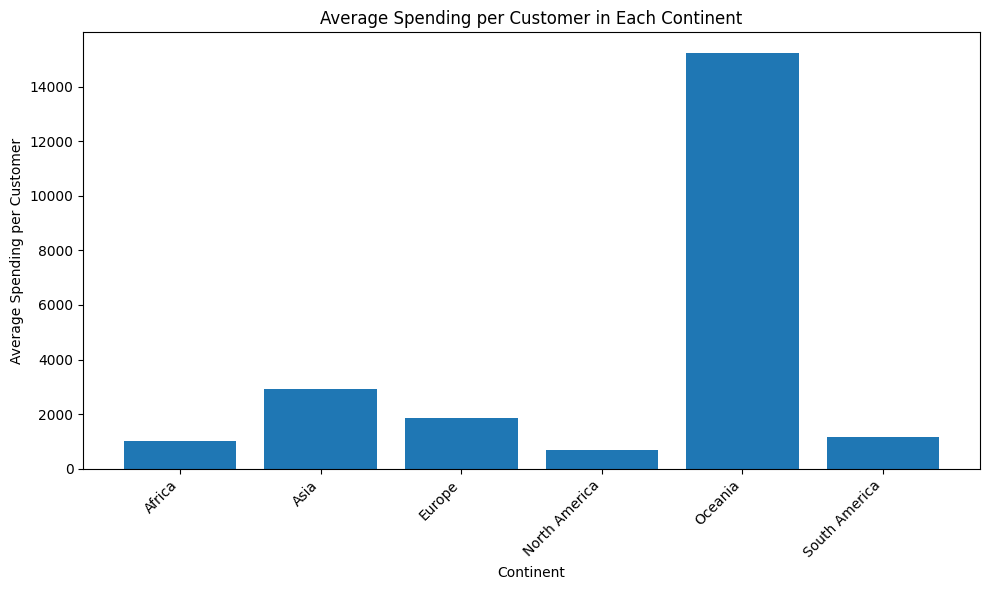

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(avg_spending_per_continent.index, avg_spending_per_continent.values)
plt.xlabel("Continent")
plt.ylabel("Average Spending per Customer")
plt.title("Average Spending per Customer in Each Continent")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

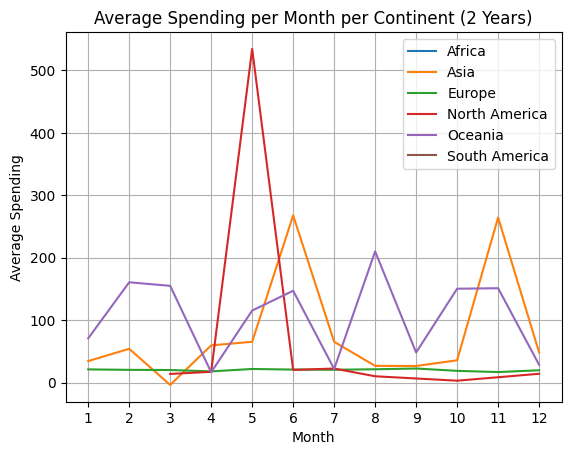

In [ ]:
# prompt: ทำ time seris Y Average Spending X เดือนตั้งแต่1-12 2ปีมาเฉลี่ยปีกัน ในแต่ละทวีป

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.

# Group data by continent, month, and year, then calculate the average spending
average_spending_by_month_year = data.groupby(['Continent', 'Month', 'Year'])['TotalPrice'].mean().reset_index()

# Calculate the average spending for each month across all years for each continent
average_spending_by_month = average_spending_by_month_year.groupby(['Continent', 'Month'])['TotalPrice'].mean().reset_index()

# Plotting
import matplotlib.pyplot as plt

continents = average_spending_by_month['Continent'].unique()

for continent in continents:
  continent_data = average_spending_by_month[average_spending_by_month['Continent'] == continent]
  plt.plot(continent_data['Month'], continent_data['TotalPrice'], label=continent)

plt.xlabel('Month')
plt.ylabel('Average Spending')
plt.title('Average Spending per Month per Continent (2 Years)')
plt.legend()
plt.xticks(range(1,13)) # Ensure all month ticks are displayed
plt.grid(True)
plt.show()

## 2. วิเคราะห์ความสัมพันธ์   Association Rules ของผู้บริโภค (groupby customer id) แต่ฤดูกาลของทวีป Europe

###เอาเฉพาะข้อมูล Europe

In [ ]:
# prompt: เอาเฉพาะข้อมูล Europe มา

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.

# Filter data for Europe
europe_data = data[data['Continent'] == 'Europe']

# Now 'europe_data' contains only the rows where the 'Continent' is 'Europe'
europe_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,Europe
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,9,12,2011,Europe
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,12,2011,Europe
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,Europe
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,Europe


###ฤดูใบไม้ผลิ

In [ ]:
data_spring = europe_data[(europe_data['Month'] >= 3) & (europe_data['Month'] <= 5)]
data_spring

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Year,Continent,TotalPrice
InvoiceDate,,,,,,,,,,,,
2011-03-01 08:30:00,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,7.95,14620.0,United Kingdom,1,3,2011,Europe,15.90
2011-03-01 08:30:00,545220,48194,DOORMAT HEARTS,2,7.95,14620.0,United Kingdom,1,3,2011,Europe,15.90
2011-03-01 08:30:00,545220,22556,PLASTERS IN TIN CIRCUS PARADE,12,1.65,14620.0,United Kingdom,1,3,2011,Europe,19.80
2011-03-01 08:30:00,545220,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,4.95,14620.0,United Kingdom,1,3,2011,Europe,14.85
2011-03-01 08:30:00,545220,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,3.75,14620.0,United Kingdom,1,3,2011,Europe,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-31 15:41:00,555147,84707A,SILVER JEWELLED MIRROR TRINKET TRAY,2,9.95,13505.0,Switzerland,31,5,2011,Europe,19.90
2011-05-31 15:41:00,555147,84711A,SILVER OVAL SHAPE TRINKET BOX,2,9.95,13505.0,Switzerland,31,5,2011,Europe,19.90
2011-05-31 15:41:00,555147,84711B,PINK OVAL SHAPE TRINKET BOX,2,9.95,13505.0,Switzerland,31,5,2011,Europe,19.90


In [ ]:
transactions_one = data_spring.groupby('CustomerID')['StockCode'].apply(list)
transactions_one

,StockCode
CustomerID,
12347.0,"[22376, 22374, 22371, 22375, 20665, 23076, 217..."
12348.0,"[23077, 23078, 23076, 22437, POST]"
12352.0,"[POST, 22654, 84050, 22138, 22844, M, M, M, M,..."
12354.0,"[23201, 23204, 23205, 23254, 23255, 23256, 219..."
12356.0,"[84991, 21212, 22938, 21124, 84457, 22857, 211..."
...,...
18272.0,"[20754, 21563, 71459, 22557, 22979, 22980, 207..."
18273.0,[79302M]
18280.0,"[82484, 22180, 22467, 22725, 22727, 22495, 223..."


In [ ]:
min_sup = 0.07

frequentItemsets_one  = list(apriori(transactions_one,min_support = min_sup))
for i in frequentItemsets_one :
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22699', '22697'}), support=0.07075236671649228, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.07075236671649228, lift=1.0), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.8658536585365855, lift=9.548177432323774), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7802197802197802, lift=9.548177432323774)])


In [ ]:
set(data[(data['StockCode']=='22697') |  (data['StockCode']=='22699')]['Description'])

{'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '}

### ฤดูร้อน

In [ ]:
data_summer = europe_data[(europe_data['Month'] >= 6) & (europe_data['Month'] <= 8)]
data_summer

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Year,Continent,TotalPrice
InvoiceDate,,,,,,,,,,,,
2011-06-01 07:37:00,555156,23299,FOOD COVER WITH BEADS SET 2,6,3.75,15643.0,United Kingdom,1,6,2011,Europe,22.50
2011-06-01 07:37:00,555156,22847,BREAD BIN DINER STYLE IVORY,1,16.95,15643.0,United Kingdom,1,6,2011,Europe,16.95
2011-06-01 07:38:00,555157,23075,PARLOUR CERAMIC WALL HOOK,16,4.15,15643.0,United Kingdom,1,6,2011,Europe,66.40
2011-06-01 07:38:00,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,5.45,15643.0,United Kingdom,1,6,2011,Europe,32.70
2011-06-01 07:38:00,555157,22423,REGENCY CAKESTAND 3 TIER,4,12.75,15643.0,United Kingdom,1,6,2011,Europe,51.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-31 17:31:00,C565077,23196,VINTAGE LEAF MAGNETIC NOTEPAD,-3,1.45,17451.0,United Kingdom,31,8,2011,Europe,-4.35
2011-08-31 17:31:00,C565077,22189,CREAM HEART CARD HOLDER,-1,3.95,17451.0,United Kingdom,31,8,2011,Europe,-3.95
2011-08-31 17:31:00,C565077,23239,SET OF 4 KNICK KNACK TINS POPPIES,-1,4.15,17451.0,United Kingdom,31,8,2011,Europe,-4.15


In [ ]:
transactions_two = data_summer.groupby('CustomerID')['StockCode'].apply(list)
transactions_two

,StockCode
CustomerID,
12347.0,"[23084, 23162, 23171, 23172, 23170, 23173, 231..."
12358.0,"[15060B, 22059, 37449, 37447, 48185, 15056P, 1..."
12359.0,"[85099C, 22993, 23050, 23049, 23051, 23052, 23..."
12360.0,"[23199, 22385, 22742, 21578, 21579, 21576, 215..."
12362.0,"[23245, 22423, 22776, 22799, 21671, 22509, 209..."
...,...
18268.0,"[84968A, 84968A]"
18272.0,"[23306, 23240, 23298, 23307, 23165, 23166, 231..."
18281.0,"[22037, 22716, 22028, 23007, 23008, 23209, 22467]"


In [ ]:
min_sup = 0.077

frequentItemsetsC_and_N = list(apriori(transactions_two,min_support = min_sup))
for i in frequentItemsetsC_and_N:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22384', '20725'}), support=0.07789580171977745, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22384', '20725'}), confidence=0.07789580171977745, lift=1.0), OrderedStatistic(items_base=frozenset({'20725'}), items_add=frozenset({'22384'}), confidence=0.5900383141762453, lift=4.942820962400157), OrderedStatistic(items_base=frozenset({'22384'}), items_add=frozenset({'20725'}), confidence=0.652542372881356, lift=4.942820962400156)])
yes
RelationRecord(items=frozenset({'23298', '47566'}), support=0.07890743550834597, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'23298', '47566'}), confidence=0.07890743550834597, lift=1.0), OrderedStatistic(items_base=frozenset({'23298'}), items_add=frozenset({'47566'}), confidence=0.48749999999999993, lift=2.9473623853211004), OrderedStatistic(items_base=frozenset({'47566'}), items_add=frozenset({'23298'}), confidence=0.47706422018348615, lift=2.947

In [ ]:
set(data[(data['StockCode']=='22384') | (data['StockCode']=='47566')]['Description'])

{'LUNCH BAG PINK POLKADOT', 'PARTY BUNTING'}

In [ ]:
set(data[(data['StockCode']=='20725')]['Description'])

{'LUNCH BAG RED RETROSPOT', 'LUNCH BAG RED SPOTTY'}

In [ ]:
set(data[(data['StockCode']=='23298')]['Description'])

{'BUNTING , SPOTTY ', 'SPOTTY BUNTING'}

###ฤดูใบไม้ร่วง

In [ ]:
data_autumn = europe_data[(europe_data['Month'] >= 9) & (europe_data['Month'] <= 11)]
data_autumn

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Year,Continent,TotalPrice
InvoiceDate,,,,,,,,,,,,
2011-09-01 08:25:00,565080,20677,PINK POLKADOT BOWL,8,1.25,13509.0,United Kingdom,1,9,2011,Europe,10.00
2011-09-01 08:25:00,565080,22128,PARTY CONES CANDY ASSORTED,24,1.25,13509.0,United Kingdom,1,9,2011,Europe,30.00
2011-09-01 09:15:00,565082,22423,REGENCY CAKESTAND 3 TIER,2,12.75,13305.0,United Kingdom,1,9,2011,Europe,25.50
2011-09-01 09:15:00,565082,15060B,FAIRY CAKE DESIGN UMBRELLA,8,3.75,13305.0,United Kingdom,1,9,2011,Europe,30.00
2011-09-01 09:15:00,565082,23245,SET OF 3 REGENCY CAKE TINS,4,4.95,13305.0,United Kingdom,1,9,2011,Europe,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-11-30 17:39:00,C579886,22197,POPCORN HOLDER,-1,0.85,15676.0,United Kingdom,30,11,2011,Europe,-0.85
2011-11-30 17:39:00,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,3.29,15676.0,United Kingdom,30,11,2011,Europe,-3.29
2011-11-30 17:42:00,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,1.25,16717.0,United Kingdom,30,11,2011,Europe,-1.25


In [ ]:
transactions_three = data_autumn.groupby('CustomerID')['StockCode'].apply(list)
transactions_three

,StockCode
CustomerID,
12347.0,"[23480, 21265, 21636, 22372, 22375, 22371, 223..."
12348.0,"[23077, 23078, POST]"
12349.0,"[23112, 23460, 21564, 21411, 21563, 22131, 221..."
12352.0,"[22801, 23198, 22980, 23245, 21314, 22692, 229..."
12356.0,"[22423, 21843]"
...,...
18276.0,"[23085, 22565, 22568, 20972, 23076, 23077, 234..."
18277.0,"[15056P, 20679, 22578, 20724, 22465, 23323, 84..."
18278.0,"[22114, 23301, 23355, 22111, 20914, 22727, 234..."


In [ ]:
min_sup = 0.077

frequentItemsetsC_and_N = list(apriori(transactions_three,min_support = min_sup))
for i in frequentItemsetsC_and_N:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22910', '22086'}), support=0.08686514886164623, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22910', '22086'}), confidence=0.08686514886164623, lift=1.0), OrderedStatistic(items_base=frozenset({'22086'}), items_add=frozenset({'22910'}), confidence=0.5092402464065708, lift=4.095439164762704), OrderedStatistic(items_base=frozenset({'22910'}), items_add=frozenset({'22086'}), confidence=0.6985915492957746, lift=4.095439164762703)])
yes
RelationRecord(items=frozenset({'22578', '22577'}), support=0.07915936952714536, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22578', '22577'}), confidence=0.07915936952714536, lift=1.0), OrderedStatistic(items_base=frozenset({'22577'}), items_add=frozenset({'22578'}), confidence=0.7847222222222223, lift=7.672540905631659), OrderedStatistic(items_base=frozenset({'22578'}), items_add=frozenset({'22577'}), confidence=0.773972602739726, lift=7.672540

In [ ]:
set(data[(data['StockCode']=='22910') | (data['StockCode']=='22086') ]['Description'])

{"PAPER CHAIN KIT 50'S CHRISTMAS ", 'PAPER CHAIN KIT VINTAGE CHRISTMAS'}

In [ ]:
set(data[(data['StockCode']=='22577')]['Description'])

{'WOODEN HEART CHRISTMAS SCANDINAVIAN'}

In [ ]:
set(data[(data['StockCode']=='22578')]['Description'])

{'WOODEN STAR CHRISTMAS SCANDINAVIAN'}

###ฤดูหนาว

In [ ]:
data_winter = europe_data[(europe_data['Month'] <= 2) | (europe_data['Month'] == 12)]
data_winter

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Year,Continent,TotalPrice
InvoiceDate,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,1,12,2010,Europe,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,1,12,2010,Europe,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,9,12,2011,Europe,10.20
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,9,12,2011,Europe,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,9,12,2011,Europe,16.60


In [ ]:
transactions_four = data_winter.groupby('CustomerID')['StockCode'].apply(list)
transactions_four

,StockCode
CustomerID,
12346.0,"[23166, 23166]"
12347.0,"[85116, 22375, 71477, 22492, 22771, 22772, 227..."
12348.0,"[84992, 22951, 84991, 84991, 21213, 21213, 226..."
12350.0,"[21908, 22412, 79066K, 79191C, 22348, 84086C, ..."
12352.0,"[21380, 22064, 21232, 22646, 22779, 22423, 226..."
...,...
18272.0,"[22075, 22074, 22076, 23358, 72799C, 72799E, 2..."
18273.0,[79302M]
18277.0,[22423]


In [ ]:
min_sup = 0.07

frequentItemsetsC_and_N = list(apriori(transactions_four,min_support = min_sup))
for i in frequentItemsetsC_and_N:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22470', '22469'}), support=0.07583859990277103, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22470', '22469'}), confidence=0.07583859990277103, lift=1.0), OrderedStatistic(items_base=frozenset({'22469'}), items_add=frozenset({'22470'}), confidence=0.5799256505576209, lift=5.301809169764561), OrderedStatistic(items_base=frozenset({'22470'}), items_add=frozenset({'22469'}), confidence=0.6933333333333334, lift=5.30180916976456)])


In [ ]:
set(data[(data['StockCode']=='22470') | (data['StockCode']=='22469')]['Description'])

{'HEART OF WICKER LARGE', 'HEART OF WICKER SMALL'}

# HW 1 >>> หา frequent Item Set และ Association Rules

> จัดกลุ่มตาม Transaction (Invoice_No)
* ของช่วงเวลา Chritmas & New Year ทั่วโลก (1 Dec - 31 Dec)
* ของประเทศในทวีป Europe
* ของประเทศในทวีป Asia
* ของช่วงเวลา ตรุษจีน ในทวีป Asia (15 Jan - 15 Feb)
* ของช่วงเวลา Chritmas & New Year ในทวีป Europe (1 Dec - 31 Dec)
* ของวันวาเลนไทน์ (14 Feb)

> โดยจัดกลุ่มตามประเทศ + เดือน (ประเทศ-เดือน ถือเป็น 1 transaction)

## Slide Presentation
> https://www.canva.com/design/DAF5jQJE09E/9XMb7svCu-kPgGlT-BVYTg/view?utm_content=DAF5jQJE09E&utm_campaign=designshare&utm_medium=link&utm_source=editor

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


## Prepare Data
> ต้องการเพียงข้อมูลที่เป็น เดือน/วัน/ปี จาก Column InvoiceDate

### แยก เดือน/วัน/ปี ออกจาก เวลา

In [ ]:
data['InvoiceDate'][0].split()[0]

'12/01/2010'

In [ ]:
date = []
for i in range(len(data['InvoiceDate'])):
  x = data['InvoiceDate'][i].split()[0]
  date.append(x)
#set(L)

In [ ]:
# ลองทดสอบดู
date[0].split('/')

['12', '01', '2010']

### แยก เดือน/วัน/ปี ออกจากกัน

In [ ]:
day =[]
month =[]
year =[]
for i in range(len(data['InvoiceDate'])):
  x = date[i].split('/')[0]
  y = date[i].split('/')[1]
  z = date[i].split('/')[2]
  month.append(x)
  day.append(y)
  year.append(z)

### นำ data ใหม่ไปใช้

In [ ]:
data_test_nonclean = data

In [ ]:
data_test_nonclean['date'] = date
data_test_nonclean['day'] = day
data_test_nonclean['month'] = month
data_test_nonclean['year'] = year

# data_test_nonclean >>> ข้อมูลยังไม่อยู่ในมาตรฐานเดียวกัน

In [ ]:
set(data_test_nonclean['date'])

{'01/04/2011',
 '01/05/2011',
 '01/06/2011',
 '01/07/2011',
 '01/09/2011',
 '01/10/2011',
 '01/11/2011',
 '01/12/2011',
 '02/01/2011',
 '02/02/2011',
 '02/03/2011',
 '02/04/2011',
 '02/06/2011',
 '02/07/2011',
 '02/08/2011',
 '02/09/2011',
 '02/10/2011',
 '02/11/2011',
 '03/01/2011',
 '03/02/2011',
 '03/03/2011',
 '03/04/2011',
 '03/06/2011',
 '03/07/2011',
 '03/08/2011',
 '03/09/2011',
 '03/10/2011',
 '03/11/2011',
 '04/01/2011',
 '04/03/2011',
 '04/04/2011',
 '04/05/2011',
 '04/06/2011',
 '04/07/2011',
 '04/08/2011',
 '04/10/2011',
 '04/11/2011',
 '04/12/2011',
 '05/01/2011',
 '05/03/2011',
 '05/04/2011',
 '05/05/2011',
 '05/06/2011',
 '05/08/2011',
 '05/09/2011',
 '05/10/2011',
 '05/11/2011',
 '05/12/2011',
 '06/01/2011',
 '06/02/2011',
 '06/03/2011',
 '06/05/2011',
 '06/06/2011',
 '06/07/2011',
 '06/08/2011',
 '06/09/2011',
 '06/10/2011',
 '06/12/2011',
 '07/01/2011',
 '07/03/2011',
 '07/04/2011',
 '07/05/2011',
 '07/06/2011',
 '07/07/2011',
 '07/08/2011',
 '07/10/2011',
 '07/11/20

In [ ]:
set(data_test_nonclean['day'])

{'01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31'}

### แปลงวัน

In [ ]:
x=[]
for i in range(1,32):
  x.append(i)
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [ ]:
data_test0 = data_test_nonclean.replace(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10','11',
                                         '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
                                         '23', '24', '25', '26', '27', '28', '29', '30', '31'],x)

In [ ]:
data_test_nonclean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,day,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,12/01/2010,01,12,2010
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,01,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,12/01/2010,01,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,01,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,01,12,2010


In [ ]:
data_test0.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,day,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,12/01/2010,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,12/01/2010,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,1,12,2010


### แปลงเดือน

In [ ]:
set(data_test0['month'])

{1,
 '1',
 10,
 11,
 12,
 2,
 '2',
 3,
 '3',
 4,
 '4',
 5,
 '5',
 6,
 '6',
 7,
 '7',
 8,
 '8',
 9,
 '9'}

In [ ]:
data_test = data_test0.replace(to_replace=["1", "2",'3','4','5','6','7','8','9'],value=[1,2,3,4,5,6,7,8,9])

In [ ]:
data_test.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
date           False
day            False
month          False
year           False
dtype: bool

In [ ]:
data_test_nonclean[data_test_nonclean['month']=='01']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,day,month,year
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,01/04/2011 10:00,1.95,13313.0,United Kingdom,01/04/2011,04,01,2011
42482,539993,21499,BLUE POLKADOT WRAP,25,01/04/2011 10:00,0.42,13313.0,United Kingdom,01/04/2011,04,01,2011
42483,539993,21498,RED RETROSPOT WRAP,25,01/04/2011 10:00,0.42,13313.0,United Kingdom,01/04/2011,04,01,2011
42484,539993,22379,RECYCLING BAG RETROSPOT,5,01/04/2011 10:00,2.10,13313.0,United Kingdom,01/04/2011,04,01,2011
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,01/04/2011 10:00,1.25,13313.0,United Kingdom,01/04/2011,04,01,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
55385,540992,21912,VINTAGE SNAKES & LADDERS,2,01/12/2011 16:57,3.75,17364.0,United Kingdom,01/12/2011,12,01,2011
55386,540992,51008,AFGHAN SLIPPER SOCK PAIR,10,01/12/2011 16:57,3.45,17364.0,United Kingdom,01/12/2011,12,01,2011
55387,540992,21508,VINTAGE KID DOLLY CARD,12,01/12/2011 16:57,0.42,17364.0,United Kingdom,01/12/2011,12,01,2011
55388,540992,22716,CARD CIRCUS PARADE,12,01/12/2011 16:57,0.42,17364.0,United Kingdom,01/12/2011,12,01,2011


In [ ]:
data_test[data_test['month']==1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,day,month,year
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,01/04/2011 10:00,1.95,13313.0,United Kingdom,01/04/2011,4,1,2011
42482,539993,21499,BLUE POLKADOT WRAP,25,01/04/2011 10:00,0.42,13313.0,United Kingdom,01/04/2011,4,1,2011
42483,539993,21498,RED RETROSPOT WRAP,25,01/04/2011 10:00,0.42,13313.0,United Kingdom,01/04/2011,4,1,2011
42484,539993,22379,RECYCLING BAG RETROSPOT,5,01/04/2011 10:00,2.10,13313.0,United Kingdom,01/04/2011,4,1,2011
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,01/04/2011 10:00,1.25,13313.0,United Kingdom,01/04/2011,4,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
77623,542745,22138,BAKING SET 9 PIECE RETROSPOT,13,1/31/2011 16:47,4.95,15881.0,United Kingdom,1/31/2011,31,1,2011
77624,542746,21034,REX CASH+CARRY JUMBO SHOPPER,2,1/31/2011 16:48,0.95,15881.0,United Kingdom,1/31/2011,31,1,2011
77625,C542748,22969,HOMEMADE JAM SCENTED CANDLES,-12,1/31/2011 16:53,1.45,15881.0,United Kingdom,1/31/2011,31,1,2011
77626,C542753,22649,STRAWBERRY FAIRY CAKE TEAPOT,-1,1/31/2011 16:57,4.95,15881.0,United Kingdom,1/31/2011,31,1,2011


### เเบ่งทวีป

In [ ]:
set(data['Country'])

{'Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'EIRE',
 'European Community',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'USA',
 'United Arab Emirates',
 'United Kingdom',
 'Unspecified'}

#### ทวีปยุโรป

In [ ]:
EU_country = ['Austria','Belgium','Cyprus','Channel Islands','Czech Republic','Denmark','EIRE','European Community',
              'Finland','France','Germany','Greece','Iceland','Italy','Lithuania','Malta','Netherlands',
              'Norway','Poland','Portugal','Spain','Sweden','Switzerland','United Kingdom']

#### ทวีปเอเชีย

In [ ]:
Asia_country = ['Hong Kong','Bahrain','Israel','Japan','Lebanon','Saudi Arabia','Singapore','United Arab Emirates']

In [ ]:
#a0 = data_test[data_test['Country']==UP_country[0]]

## Code สำหรับหาชื่อสินค้า จาก Column "Description"

In [ ]:
def finditem(x,y) :
  L=set(data[(data['StockCode']==x)|(data['StockCode']==y)]['Description'])
  return L

In [ ]:
def finditems(x, y='', z='', w='') :
  I =set(data[(data['StockCode']==x)|(data['StockCode']==y)|(data['StockCode']==z)|(data['StockCode']==w)]['Description'])
  return I

## 1.ช่วงเวลา Christmas & New Year (1 Dec - 31 Dec)

### จัดกลุ่มตาม Transaction (Invoice_No)

In [ ]:
data_C_and_N = data_test[data_test['month']==12]

In [ ]:
data_C_and_N

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,day,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,12/01/2010,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,12/01/2010,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,1,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,12/09/2011,9,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,12/09/2011,9,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,12/09/2011,9,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,12/09/2011,9,12,2011


In [ ]:
transactionsC_and_N = data_C_and_N.groupby('InvoiceNo')['StockCode'].apply(list)

In [ ]:
from apyori import apriori
frequentItemsets = list(apriori(transactionsC_and_N,min_support = 0.05))
#frequentItemsets

In [ ]:
min_sup = 0.04

frequentItemsetsC_and_N = list(apriori(transactionsC_and_N,min_support = min_sup))
for i in frequentItemsetsC_and_N:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22086', '22910'}), support=0.047697368421052634, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22086', '22910'}), confidence=0.047697368421052634, lift=1.0), OrderedStatistic(items_base=frozenset({'22086'}), items_add=frozenset({'22910'}), confidence=0.5160142348754448, lift=7.195794834960331), OrderedStatistic(items_base=frozenset({'22910'}), items_add=frozenset({'22086'}), confidence=0.6651376146788991, lift=7.195794834960332)])


In [ ]:
data_C_and_N[data_C_and_N['StockCode']=='POST']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,day,month,year
45,536370,POST,POSTAGE,3,12/01/2010 08:45,18.0,12583.0,France,12/01/2010,1,12,2010
386,536403,POST,POSTAGE,1,12/01/2010 11:27,15.0,12791.0,Netherlands,12/01/2010,1,12,2010
1123,536527,POST,POSTAGE,1,12/01/2010 13:04,18.0,12662.0,Germany,12/01/2010,1,12,2010
5073,536840,POST,POSTAGE,1,12/02/2010 18:27,18.0,12738.0,Germany,12/02/2010,2,12,2010
5258,536852,POST,POSTAGE,1,12/03/2010 09:51,18.0,12686.0,France,12/03/2010,3,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,12/09/2011 10:10,15.0,12423.0,Belgium,12/09/2011,9,12,2011
541216,581494,POST,POSTAGE,2,12/09/2011 10:13,18.0,12518.0,Germany,12/09/2011,9,12,2011
541730,581570,POST,POSTAGE,1,12/09/2011 11:59,18.0,12662.0,Germany,12/09/2011,9,12,2011
541767,581574,POST,POSTAGE,2,12/09/2011 12:09,18.0,12526.0,Germany,12/09/2011,9,12,2011


สรุปได้ดังนั้น
* RelationRecord(items=frozenset({'22910', '22086'}), support=0.047697368421052634)
  * ordered_statistics=OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22910', '22086'}), confidence=0.047697368421052634, lift=1.0)
  * OrderedStatistic(items_base=frozenset({'22086'}), items_add=frozenset({'22910'}), confidence=0.5160142348754448, lift=7.195794834960331)
  * OrderedStatistic(items_base=frozenset({'22910'}), items_add=frozenset({'22086'}), confidence=0.6651376146788991, lift=7.195794834960332)


In [ ]:
finditem('22910','22086')

{"PAPER CHAIN KIT 50'S CHRISTMAS ", 'PAPER CHAIN KIT VINTAGE CHRISTMAS'}

### จัดกลุ่มตาม Transaction (ประเทศ + เดือน)

In [ ]:
transactionsC_and_N = data_C_and_N.groupby(['Country', 'month'])['StockCode'].apply(list)

In [ ]:
transactionsC_and_N

Country          month
Australia        12       [22941, 21622, 21791, 35004C, 35004G, 85014B, ...
Austria          12       [22153, 37449, 37446, 22962, 21428, 22113, 223...
Bahrain          12                                                [72802B]
Belgium          12       [84375, 21217, 21212, 21977, 22417, 21975, 219...
Channel Islands  12       [22690, 21955, 20685, 21523, 21169, 22112, 214...
Cyprus           12       [85123A, 21031, 21026, 21025, 21032, 21030, 21...
Denmark          12       [22847, 22779, 22331, 22365, 22673, 22670, 825...
EIRE             12       [22968, 85071A, 85071C, 22355, 21579, 21576, 2...
Finland          12       [84992, 22951, 84991, 84991, 21213, 21213, 226...
France           12       [22728, 22727, 22726, 21724, 21883, 10002, 217...
Germany          12       [22809, 84347, 84945, 22242, 22244, 22243, 474...
Greece           12       [POST, 20685, 22941, 22816, 22966, 20725, 2072...
Iceland          12       [85116, 22375, 71477, 22492, 22771, 227

In [ ]:
min_sup =0.3
frequentItemsetsC_and_N = list(apriori(transactionsC_and_N,min_support = min_sup))
for i in frequentItemsetsC_and_N:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'POST', '20750'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'POST', '20750'}), confidence=0.3333333333333333, lift=1.0), OrderedStatistic(items_base=frozenset({'20750'}), items_add=frozenset({'POST'}), confidence=0.9, lift=1.7357142857142858), OrderedStatistic(items_base=frozenset({'POST'}), items_add=frozenset({'20750'}), confidence=0.6428571428571429, lift=1.735714285714286)])
yes
RelationRecord(items=frozenset({'22727', '22728'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22727', '22728'}), confidence=0.3333333333333333, lift=1.0), OrderedStatistic(items_base=frozenset({'22727'}), items_add=frozenset({'22728'}), confidence=1.0, lift=3.0), OrderedStatistic(items_base=frozenset({'22728'}), items_add=frozenset({'22727'}), confidence=1.0, lift=3.0)])


In [ ]:
finditem('POST', '20750')

{'POSTAGE', 'RED RETROSPOT MINI CASES', nan}

In [ ]:
finditem('22727', '22728')

{'ALARM CLOCK BAKELIKE PINK', 'ALARM CLOCK BAKELIKE RED '}

## 2.ประเทศในทวีป Europe

In [ ]:
EU_data = data_test[data_test['Country']==""]
for i in range(len(EU_country)):
  x = data_test[data_test['Country']==EU_country[i]]
  EU_data=pd.concat([x,EU_data])

In [ ]:
len(set(EU_data['Country']))

24

In [ ]:
EU_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,day,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,12/01/2010,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,12/01/2010,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,1,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
536964,581232,15056BL,EDWARDIAN PARASOL BLACK,24,12/08/2011 10:26,5.95,12358.0,Austria,12/08/2011,8,12,2011
536965,581232,15056P,EDWARDIAN PARASOL PINK,12,12/08/2011 10:26,5.95,12358.0,Austria,12/08/2011,8,12,2011
536966,581232,22059,CERAMIC STRAWBERRY DESIGN MUG,24,12/08/2011 10:26,0.39,12358.0,Austria,12/08/2011,8,12,2011
536967,581232,22646,CERAMIC STRAWBERRY CAKE MONEY BANK,36,12/08/2011 10:26,0.39,12358.0,Austria,12/08/2011,8,12,2011


### จัดกลุ่มตาม Transaction (Invoice_No)

In [ ]:
transactionsEU = EU_data.groupby('InvoiceNo')['StockCode'].apply(list)

In [ ]:
frequentItemsets = list(apriori(transactionsEU,min_support = 0.05))
frequentItemsets

[RelationRecord(items=frozenset({'20725'}), support=0.06187089502934204, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725'}), confidence=0.06187089502934204, lift=1.0)]),
 RelationRecord(items=frozenset({'20727'}), support=0.05009521588745094, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20727'}), confidence=0.05009521588745094, lift=1.0)]),
 RelationRecord(items=frozenset({'21212'}), support=0.05149430647856671, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'21212'}), confidence=0.05149430647856671, lift=1.0)]),
 RelationRecord(items=frozenset({'22197'}), support=0.05584703276203801, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22197'}), confidence=0.05584703276203801, lift=1.0)]),
 RelationRecord(items=frozenset({'22383'}), support=0.050600443045353855, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({

In [ ]:
min_sup = 0.03

frequentItemsetsEU= list(apriori(transactionsEU,min_support = min_sup))
for i in frequentItemsetsEU:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22386', '85099B'}), support=0.03233453810578679, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22386', '85099B'}), confidence=0.03233453810578679, lift=1.0), OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6775244299674267, lift=8.203944050584402), OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}), confidence=0.39152941176470585, lift=8.203944050584402)])
yes
RelationRecord(items=frozenset({'22699', '22697'}), support=0.03011931133652015, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22697', '22699'}), confidence=0.03011931133652015, lift=1.0), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7402101241642789, lift=17.20537191045263), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7000903342366757, lift=17

In [ ]:
finditem('22386','85099B')

{'JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'}

### จัดกลุ่มตาม Transaction (ประเทศ + เดือน)

In [ ]:
transactionsEU = EU_data.groupby(['Country', 'month'])['StockCode'].apply(list)
min_sup = 0.4
frequentItemsetsEU= list(apriori(transactionsEU,min_support = min_sup))
for i in frequentItemsetsEU:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22326', 'POST'}), support=0.41150442477876104, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22326', 'POST'}), confidence=0.41150442477876104, lift=1.0), OrderedStatistic(items_base=frozenset({'22326'}), items_add=frozenset({'POST'}), confidence=0.9207920792079208, lift=1.2688964018353055), OrderedStatistic(items_base=frozenset({'POST'}), items_add=frozenset({'22326'}), confidence=0.5670731707317073, lift=1.2688964018353055)])


In [ ]:
finditem('POST', '22326')

{'POSTAGE', 'ROUND SNACK BOXES SET OF4 WOODLAND ', nan}

##3.ของช่วงเวลา ตรุษจีน ในทวีป Asia (15 jan - 15 Feb)

###เเยกทวีปเอเชีย

In [ ]:
Asia_data = data_test[data_test['Country']==""]
for i in range(len(Asia_country)):
  x = data_test[data_test['Country']==Asia_country[i]]
  Asia_data=pd.concat([x,Asia_data])

In [ ]:
len(set(Asia_data['Country']))

8

###หาข้อมูลช่วงตรุษจีน

In [ ]:
M1_Asia_data=Asia_data[(Asia_data['month']==1)]

In [ ]:
D1_Asia_data=M1_Asia_data[(M1_Asia_data['day']>=15)]

In [ ]:
#D1_Asia_data

In [ ]:
M2_Asia_data=Asia_data[(Asia_data['month']==2)]

In [ ]:
#M2_Asia_data

In [ ]:
D2_Asia_data=M2_Asia_data[(M2_Asia_data['day']<=15)]

In [ ]:
D2_Asia_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,day,month,year
89570,543911,21485,RETROSPOT HEART HOT WATER BOTTLE,6,2/14/2011 12:46,4.95,17829.0,United Arab Emirates,2/14/2011,14,2,2011
89571,543911,48138,DOORMAT UNION FLAG,2,2/14/2011 12:46,7.95,17829.0,United Arab Emirates,2/14/2011,14,2,2011
89572,543911,85150,LADIES & GENTLEMEN METAL SIGN,24,2/14/2011 12:46,2.55,17829.0,United Arab Emirates,2/14/2011,14,2,2011
89573,543911,82552,WASHROOM METAL SIGN,24,2/14/2011 12:46,1.45,17829.0,United Arab Emirates,2/14/2011,14,2,2011
89574,543911,82551,LAUNDRY 15C METAL SIGN,12,2/14/2011 12:46,1.45,17829.0,United Arab Emirates,2/14/2011,14,2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
85761,543518,21080,SET/20 RED RETROSPOT PAPER NAPKINS,96,02/09/2011 11:21,0.64,12753.0,Japan,02/09/2011,9,2,2011
85762,543518,21217,RED RETROSPOT ROUND CAKE TINS,24,02/09/2011 11:21,8.95,12753.0,Japan,02/09/2011,9,2,2011
85763,543518,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",48,02/09/2011 11:21,4.25,12753.0,Japan,02/09/2011,9,2,2011
85764,543518,21980,PACK OF 12 RED RETROSPOT TISSUES,96,02/09/2011 11:21,0.29,12753.0,Japan,02/09/2011,9,2,2011


###เอาสองตารางรวมกัน

In [ ]:
use_Asia_data=pd.concat([D1_Asia_data,D2_Asia_data])

In [ ]:
use_Asia_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,day,month,year
70758,542102,21519,GIN & TONIC DIET GREETING CARD,72,1/25/2011 13:26,0.36,12744.0,Singapore,1/25/2011,25,1,2011
70759,542102,22697,GREEN REGENCY TEACUP AND SAUCER,6,1/25/2011 13:26,2.95,12744.0,Singapore,1/25/2011,25,1,2011
70760,542102,22699,ROSES REGENCY TEACUP AND SAUCER,6,1/25/2011 13:26,2.95,12744.0,Singapore,1/25/2011,25,1,2011
70761,542102,22343,PARTY PIZZA DISH RED RETROSPOT,24,1/25/2011 13:26,0.21,12744.0,Singapore,1/25/2011,25,1,2011
70762,542102,22344,PARTY PIZZA DISH PINK POLKADOT,24,1/25/2011 13:26,0.21,12744.0,Singapore,1/25/2011,25,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
85761,543518,21080,SET/20 RED RETROSPOT PAPER NAPKINS,96,02/09/2011 11:21,0.64,12753.0,Japan,02/09/2011,9,2,2011
85762,543518,21217,RED RETROSPOT ROUND CAKE TINS,24,02/09/2011 11:21,8.95,12753.0,Japan,02/09/2011,9,2,2011
85763,543518,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",48,02/09/2011 11:21,4.25,12753.0,Japan,02/09/2011,9,2,2011
85764,543518,21980,PACK OF 12 RED RETROSPOT TISSUES,96,02/09/2011 11:21,0.29,12753.0,Japan,02/09/2011,9,2,2011


### จัดกลุ่มตาม Transaction (Invoice_No)

In [ ]:
transactionsAsia = use_Asia_data.groupby('InvoiceNo')['StockCode'].apply(list)

In [ ]:
transactionsAsia

InvoiceNo
541975    [22620, 85183B, 85183A, 16236, 21058, 21967, 2...
542102    [21519, 22697, 22699, 22343, 22344, 22345, 223...
542276    [82551, 21165, 82600, 21754, 21756, 82482, 824...
543179    [22407, 22406, 22405, 21745, 22496, 22495, 224...
543518    [22759, 22662, 22661, 21717, 22957, 22861, 222...
543911    [21485, 48138, 85150, 82552, 82551, 82583, 224...
Name: StockCode, dtype: object

In [ ]:
min_sup = 0.3
frequentItemsets_A= list(apriori(transactionsAsia,min_support = min_sup))
for i in frequentItemsets_A:
    if i[0].__len__()>3:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'20682', '22551', '22203', '22202'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20682', '22551', '22203', '22202'}), confidence=0.3333333333333333, lift=1.0), OrderedStatistic(items_base=frozenset({'20682'}), items_add=frozenset({'22202', '22551', '22203'}), confidence=1.0, lift=3.0), OrderedStatistic(items_base=frozenset({'22202'}), items_add=frozenset({'20682', '22551', '22203'}), confidence=1.0, lift=3.0), OrderedStatistic(items_base=frozenset({'22203'}), items_add=frozenset({'20682', '22551', '22202'}), confidence=1.0, lift=3.0), OrderedStatistic(items_base=frozenset({'22551'}), items_add=frozenset({'20682', '22202', '22203'}), confidence=1.0, lift=3.0), OrderedStatistic(items_base=frozenset({'20682', '22202'}), items_add=frozenset({'22551', '22203'}), confidence=1.0, lift=3.0), OrderedStatistic(items_base=frozenset({'20682', '22203'}), items_add=frozenset({'22551', '22202'}), c

### จัดกลุ่มตาม Transaction (ประเทศ + เดือน)

In [ ]:
transactionsAsia = use_Asia_data.groupby(['Country', 'month'])['StockCode'].apply(list)
min_sup = 0.4
frequentItemsets_A= list(apriori(transactionsAsia,min_support = min_sup))
for i in frequentItemsets_A:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'20682', '22202'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20682', '22202'}), confidence=0.4, lift=1.0), OrderedStatistic(items_base=frozenset({'20682'}), items_add=frozenset({'22202'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'22202'}), items_add=frozenset({'20682'}), confidence=1.0, lift=2.5)])
yes
RelationRecord(items=frozenset({'20682', '22203'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20682', '22203'}), confidence=0.4, lift=1.0), OrderedStatistic(items_base=frozenset({'20682'}), items_add=frozenset({'22203'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'22203'}), items_add=frozenset({'20682'}), confidence=1.0, lift=2.5)])
yes
RelationRecord(items=frozenset({'20682', '22551'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20682', '22551

In [ ]:
def finditems(x, y='', z='', w='') :
  I =set(data[(data['StockCode']==x)|(data['StockCode']==y)|(data['StockCode']==z)|(data['StockCode']==w)]['Description'])
  return I

In [ ]:
finditems('20682', '22551', '22203', '22202')

{'MILK PAN PINK POLKADOT',
 'MILK PAN RED RETROSPOT',
 'PLASTERS IN TIN SPACEBOY',
 'RED RETROSPOT CHILDRENS UMBRELLA',
 nan}

In [ ]:
finditems('20682', '22202')

{'MILK PAN PINK POLKADOT', 'RED RETROSPOT CHILDRENS UMBRELLA', nan}

In [ ]:
finditems('82552', '82551', '85150')

{'LADIES & GENTLEMEN METAL SIGN',
 'LAUNDRY 15C METAL SIGN',
 'WASHROOM METAL SIGN',
 nan}

##4.ของช่วงเวลา Christmas & New Year ในทวีป Europe(1 Dec - 31 Dec)

In [ ]:
C_N_EU_data = EU_data[EU_data['month']==12]

In [ ]:
C_N_EU_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,day,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,12/01/2010,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,12/01/2010,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,12/01/2010,1,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
536964,581232,15056BL,EDWARDIAN PARASOL BLACK,24,12/08/2011 10:26,5.95,12358.0,Austria,12/08/2011,8,12,2011
536965,581232,15056P,EDWARDIAN PARASOL PINK,12,12/08/2011 10:26,5.95,12358.0,Austria,12/08/2011,8,12,2011
536966,581232,22059,CERAMIC STRAWBERRY DESIGN MUG,24,12/08/2011 10:26,0.39,12358.0,Austria,12/08/2011,8,12,2011
536967,581232,22646,CERAMIC STRAWBERRY CAKE MONEY BANK,36,12/08/2011 10:26,0.39,12358.0,Austria,12/08/2011,8,12,2011


### จัดกลุ่มตาม Transaction (Invoice_No)

In [ ]:
transactionsC_N_EU = C_N_EU_data.groupby('InvoiceNo')['StockCode'].apply(list)
transactionsC_N_EU

InvoiceNo
536365     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                        [22633, 22632]
536367     [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                          [22960, 22913, 22912, 22914]
536369                                               [21756]
                                 ...                        
C581484                                              [23843]
C581490                                       [22178, 23144]
C581499                                                  [M]
C581568                                              [21258]
C581569                                       [84978, 20979]
Name: StockCode, Length: 3027, dtype: object

In [ ]:
min_sup = 0.04
frequentItemsetsC_N_EU= list(apriori(transactionsC_N_EU,min_support = min_sup))
for i in frequentItemsetsC_N_EU:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22086', '22910'}), support=0.04790221341261976, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22086', '22910'}), confidence=0.04790221341261976, lift=1.0), OrderedStatistic(items_base=frozenset({'22086'}), items_add=frozenset({'22910'}), confidence=0.5160142348754448, lift=7.165023343889778), OrderedStatistic(items_base=frozenset({'22910'}), items_add=frozenset({'22086'}), confidence=0.6651376146788991, lift=7.165023343889778)])


In [ ]:
finditem('22086', '22910')

{"PAPER CHAIN KIT 50'S CHRISTMAS ", 'PAPER CHAIN KIT VINTAGE CHRISTMAS'}

### จัดกลุ่มตาม Transaction (ประเทศ + เดือน)

In [ ]:
transactionsC_N_EU = C_N_EU_data.groupby(['Country', 'month'])['StockCode'].apply(list)
min_sup = 0.4
frequentItemsetsC_N_EU= list(apriori(transactionsC_N_EU,min_support = min_sup))
for i in frequentItemsetsC_N_EU:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'POST', '20750'}), support=0.4090909090909091, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'POST', '20750'}), confidence=0.4090909090909091, lift=1.0), OrderedStatistic(items_base=frozenset({'20750'}), items_add=frozenset({'POST'}), confidence=0.9000000000000001, lift=1.4142857142857146), OrderedStatistic(items_base=frozenset({'POST'}), items_add=frozenset({'20750'}), confidence=0.6428571428571429, lift=1.4142857142857144)])


In [ ]:
finditem('POST', '20750')

{'POSTAGE', 'RED RETROSPOT MINI CASES', nan}

##5.ของวันวาเลนไทน์ (14 Feb)

In [ ]:
M14_data = data_test[(data_test['month']==2)]

In [ ]:
va_data=M14_data[M14_data['day']==14]

In [ ]:
va_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,day,month,year
88847,543821,22926,IVORY GIANT GARDEN THERMOMETER,2,2/14/2011 9:24,5.95,17667.0,United Kingdom,2/14/2011,14,2,2011
88848,543821,22928,YELLOW GIANT GARDEN THERMOMETER,2,2/14/2011 9:24,5.95,17667.0,United Kingdom,2/14/2011,14,2,2011
88849,543821,22925,BLUE GIANT GARDEN THERMOMETER,2,2/14/2011 9:24,5.95,17667.0,United Kingdom,2/14/2011,14,2,2011
88850,543821,85175,CACTI T-LIGHT CANDLES,16,2/14/2011 9:24,0.42,17667.0,United Kingdom,2/14/2011,14,2,2011
88851,543821,22456,NATURAL SLATE CHALKBOARD LARGE,3,2/14/2011 9:24,4.95,17667.0,United Kingdom,2/14/2011,14,2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
89950,543979,21889,WOODEN BOX OF DOMINOES,1,2/14/2011 15:43,1.25,14606.0,United Kingdom,2/14/2011,14,2,2011
89951,543979,85176,SEWING SUSAN 21 NEEDLE SET,1,2/14/2011 15:43,0.85,14606.0,United Kingdom,2/14/2011,14,2,2011
89952,543979,37446,MINI CAKE STAND WITH HANGING CAKES,1,2/14/2011 15:43,1.45,14606.0,United Kingdom,2/14/2011,14,2,2011
89953,543979,21657,MILK BOTTLE WITH GLASS STOPPER,1,2/14/2011 15:43,6.95,14606.0,United Kingdom,2/14/2011,14,2,2011


### จัดกลุ่มตาม Transaction (Invoice_No)

In [ ]:
transactions_va = va_data.groupby('InvoiceNo')['StockCode'].apply(list)

In [ ]:
len(transactions_va)

55

In [ ]:
min_sup = 0.09
frequentItemsets_va= list(apriori(transactions_va,min_support = min_sup))
for i in frequentItemsets_va:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22722', '22720'}), support=0.09090909090909091, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22720', '22722'}), confidence=0.09090909090909091, lift=1.0), OrderedStatistic(items_base=frozenset({'22720'}), items_add=frozenset({'22722'}), confidence=0.625, lift=5.729166666666667), OrderedStatistic(items_base=frozenset({'22722'}), items_add=frozenset({'22720'}), confidence=0.8333333333333334, lift=5.729166666666667)])
yes
RelationRecord(items=frozenset({'22720', '22969'}), support=0.09090909090909091, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22720', '22969'}), confidence=0.09090909090909091, lift=1.0), OrderedStatistic(items_base=frozenset({'22720'}), items_add=frozenset({'22969'}), confidence=0.625, lift=6.875), OrderedStatistic(items_base=frozenset({'22969'}), items_add=frozenset({'22720'}), confidence=1.0, lift=6.875)])


In [ ]:
finditems('22720', '22969')

{'HOMEMADE JAM SCENTED CANDLES', 'SET OF 3 CAKE TINS PANTRY DESIGN ', nan}

### จัดกลุ่มตาม Transaction (ประเทศ + เดือน)

In [ ]:
transactions_va

InvoiceNo
543821     [22926, 22928, 22925, 85175, 22456, 22854, 227...
543822     [22139, 20973, 22585, 22960, 84380, 84378, 229...
543823                          [22138, 21658, 22567, 20914]
543824     [22745, 22746, 20971, 20972, 16225, 22748, 227...
543825     [22926, 22782, 22411, 20914, 22381, 20681, 22690]
543826     [90104, 90146, 90175A, 90181B, 90214J, 90214S,...
543827                                              [84406B]
543828     [22723, 22722, 22720, 22899, 22567, 84987, 228...
543829     [21238, 21239, 21240, 84997B, 84997D, 84997C, ...
543831     [84519A, 20711, 20713, 85099F, 22385, 21929, 2...
543832     [84879, 22077, 22855, 21899, 21900, 21901, 219...
543833     [22788, 22957, 21621, 22722, 22384, 21791, 217...
543836     [84987, 84991, 84988, 84992, 84378, 22965, 229...
543839                                [22207, 21731, 47590A]
543842                                               [22693]
543852     [22355, 21931, 22356, 85123A, 85175, 82484, 82...
543899     [C2

In [ ]:
transactions_va = va_data.groupby(['Country', 'month'])['StockCode'].apply(list)
min_sup = 0.500000000000000001
frequentItemsets_va= list(apriori(transactions_va,min_support = min_sup))
for i in frequentItemsets_va:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'20719', '20726'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20719', '20726'}), confidence=0.5, lift=1.0), OrderedStatistic(items_base=frozenset({'20719'}), items_add=frozenset({'20726'}), confidence=1.0, lift=2.0), OrderedStatistic(items_base=frozenset({'20726'}), items_add=frozenset({'20719'}), confidence=1.0, lift=2.0)])
yes
RelationRecord(items=frozenset({'20719', '20728'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20719', '20728'}), confidence=0.5, lift=1.0), OrderedStatistic(items_base=frozenset({'20719'}), items_add=frozenset({'20728'}), confidence=1.0, lift=2.0), OrderedStatistic(items_base=frozenset({'20728'}), items_add=frozenset({'20719'}), confidence=1.0, lift=2.0)])
yes
RelationRecord(items=frozenset({'22383', '20719'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22383', '20719

## 6.จัดกลุ่มตามประเทศ + เดือน โดยไม่มีเงื่อนไข

In [ ]:
transactions_Mon_Con = data_test.groupby(['Country', 'month'])['StockCode'].apply(list)

In [ ]:
transactions_Mon_Con

Country      month
Australia    1        [22078, 22079, 22080, 22077, 22505, 22516, 225...
             2        [84978, 22960, 47590B, 47566, 22087, 22720, 22...
             3        [22978, 22980, 22993, 22654, 22968, 22505, 225...
             4        [POST, 22232, 22993, 22449, 20726, 20725, 2072...
             5        [22699, 22859, 22730, 84663A, 23206, 48129, 23...
                                            ...                        
Unspecified  6        [23122, 23119, 23108, 23240, 23237, 23239, 232...
             7        [21634, 21212, 22964, 23254, 23256, 84378, 209...
             8        [23236, 21210, 23313, 23318, 22952, 22950, 232...
             9        [22904, 21329, 21992, 20772, 23196, 22543, 225...
             11       [22326, 20725, 22628, 22631, 84997D, 23254, 23...
Name: StockCode, Length: 296, dtype: object

In [ ]:
min_sup = 0.32
frequentItemsets_Mon_Con= list(apriori(transactions_Mon_Con,min_support = min_sup))
for i in frequentItemsets_Mon_Con:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22326', 'POST'}), support=0.32094594594594594, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22326', 'POST'}), confidence=0.32094594594594594, lift=1.0), OrderedStatistic(items_base=frozenset({'22326'}), items_add=frozenset({'POST'}), confidence=0.8407079646017699, lift=1.4638209266007287), OrderedStatistic(items_base=frozenset({'POST'}), items_add=frozenset({'22326'}), confidence=0.5588235294117647, lift=1.463820926600729)])


In [ ]:
finditem('22326', 'POST')

{'POSTAGE', 'ROUND SNACK BOXES SET OF4 WOODLAND ', nan}

# Quiz 8 (2024)
